In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [2]:
df = pd.read_csv("ds_salaries.csv")

In [3]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [7]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [8]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [15]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [18]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [20]:
df.describe().sum()

work_year        1.273610e+04
salary           3.262296e+07
salary_in_usd    1.101017e+06
remote_ratio     1.068632e+03
dtype: float64

In [21]:
df.duplicated().sum()

42

In [22]:
df.shape

(607, 11)

In [25]:
df.drop(['experience_level', 'employment_type','job_title', 'salary_currency',
         'employee_residence','company_location', 'company_size' ], axis = 1, inplace = True)

In [26]:
df

,work_year,salary,salary_in_usd,remote_ratio
0,2020,70000,79833,0
1,2020,260000,260000,0
2,2020,85000,109024,50
3,2020,20000,20000,0
4,2020,150000,150000,50
...,...,...,...,...
602,2022,154000,154000,100
603,2022,126000,126000,100
604,2022,129000,129000,0
605,2022,150000,150000,100


In [41]:
x = df[['work_year', 'salary','salary_in_usd']]
y = df['remote_ratio']
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=10)

In [42]:
scaler = MinMaxScaler()
tx_train = scaler.fit_transform(x_train)
tx_test = scaler.transform(x_test)

In [43]:
model = LogisticRegression()
model.fit(tx_train, y_train)

LogisticRegression()

In [44]:
pred =model.predict(tx_test)

In [45]:
confusion_matrix(y_true = y_test,y_pred = pred)

array([[  0,   4,  34],
       [  0,   3,  33],
       [  0,   5, 122]], dtype=int64)

In [46]:
accuracy_score(y_true = y_test,y_pred = pred)

0.6218905472636815

<AxesSubplot: xlabel='remote_ratio', ylabel='Density'>

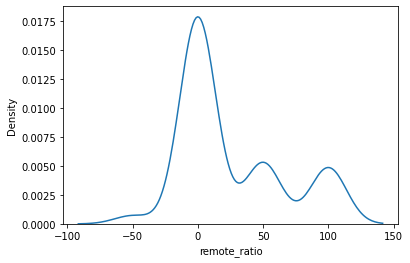

In [47]:
sns.kdeplot(pred-y_test)

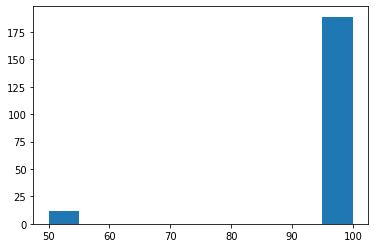

In [48]:
plt.hist(pred)
plt.show()

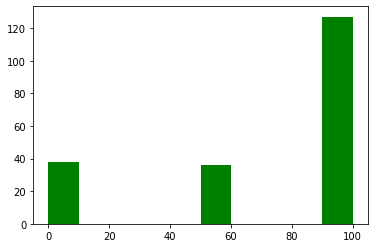

In [49]:
plt.hist(y_test,color = "green")
plt.show()

In [51]:
accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    f = cross_val_score(knn,tx_train,y_train,cv = 10)
    accuracy.append(f.mean())

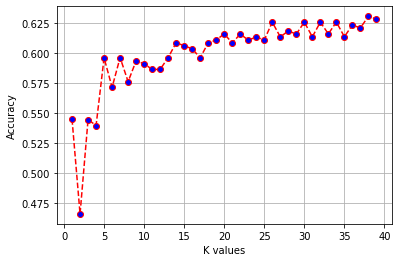

In [52]:
plt.plot(range(1,40),accuracy,marker = 'o',linestyle = '--',color = 'red',markerfacecolor = 'blue')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [53]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(tx_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [54]:
pred = knn.predict(tx_test)

In [55]:
confusion_matrix(y_true = y_test,y_pred = pred)

array([[  4,   2,  32],
       [  3,  11,  22],
       [  9,  12, 106]], dtype=int64)

In [56]:
accuracy_score(y_test,pred)

0.6019900497512438

In [59]:
clf = SVC(kernel = "linear")
clf.fit(tx_train,y_train)

SVC(kernel='linear')

In [60]:
pred = clf.predict(tx_test)

In [61]:
confusion_matrix(y_test,pred)

array([[  0,   0,  38],
       [  0,   0,  36],
       [  0,   0, 127]], dtype=int64)

<AxesSubplot: >

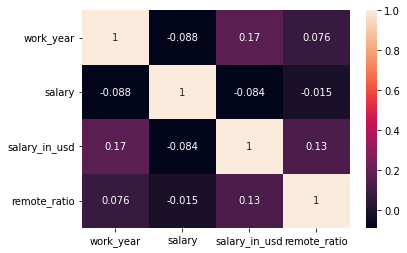

In [64]:
sns.heatmap(df.corr(),annot =True)

<AxesSubplot: xlabel='remote_ratio', ylabel='Density'>

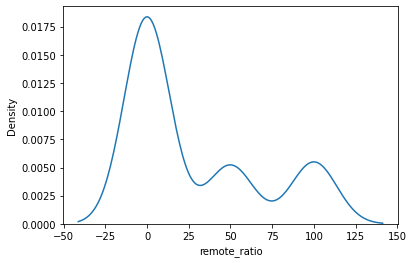

In [65]:
sns.kdeplot(pred-y_test)

In [68]:
DTF = DecisionTreeClassifier()
DTF.fit(tx_train,y_train)

DecisionTreeClassifier()

In [69]:
pred = DTF.predict(tx_test)

In [70]:
confusion_matrix(y_true = y_test,y_pred = pred)


array([[13,  7, 18],
       [ 8, 16, 12],
       [31, 13, 83]], dtype=int64)

In [71]:
accuracy_score(y_true = y_test,y_pred = pred)

0.5572139303482587

[Text(0.5225568181818182, 0.975, 'X[0] <= 0.75\ngini = 0.536\nsamples = 406\nvalue = [89, 63, 254]'),
 Text(0.3306818181818182, 0.925, 'X[2] <= 0.184\ngini = 0.602\nsamples = 185\nvalue = [31, 57, 97]'),
 Text(0.17545454545454545, 0.875, 'X[2] <= 0.113\ngini = 0.64\nsamples = 89\nvalue = [18, 37, 34]'),
 Text(0.09454545454545454, 0.825, 'X[0] <= 0.25\ngini = 0.644\nsamples = 53\nvalue = [13, 16, 24]'),
 Text(0.03636363636363636, 0.775, 'X[1] <= 0.001\ngini = 0.631\nsamples = 15\nvalue = [5, 7, 3]'),
 Text(0.02181818181818182, 0.725, 'X[2] <= 0.041\ngini = 0.406\nsamples = 8\nvalue = [1, 6, 1]'),
 Text(0.014545454545454545, 0.675, 'X[2] <= 0.012\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1]'),
 Text(0.007272727272727273, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.02181818181818182, 0.625, 'X[2] <= 0.027\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.014545454545454545, 0.575, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.02909090909090909, 0.575, 'gin

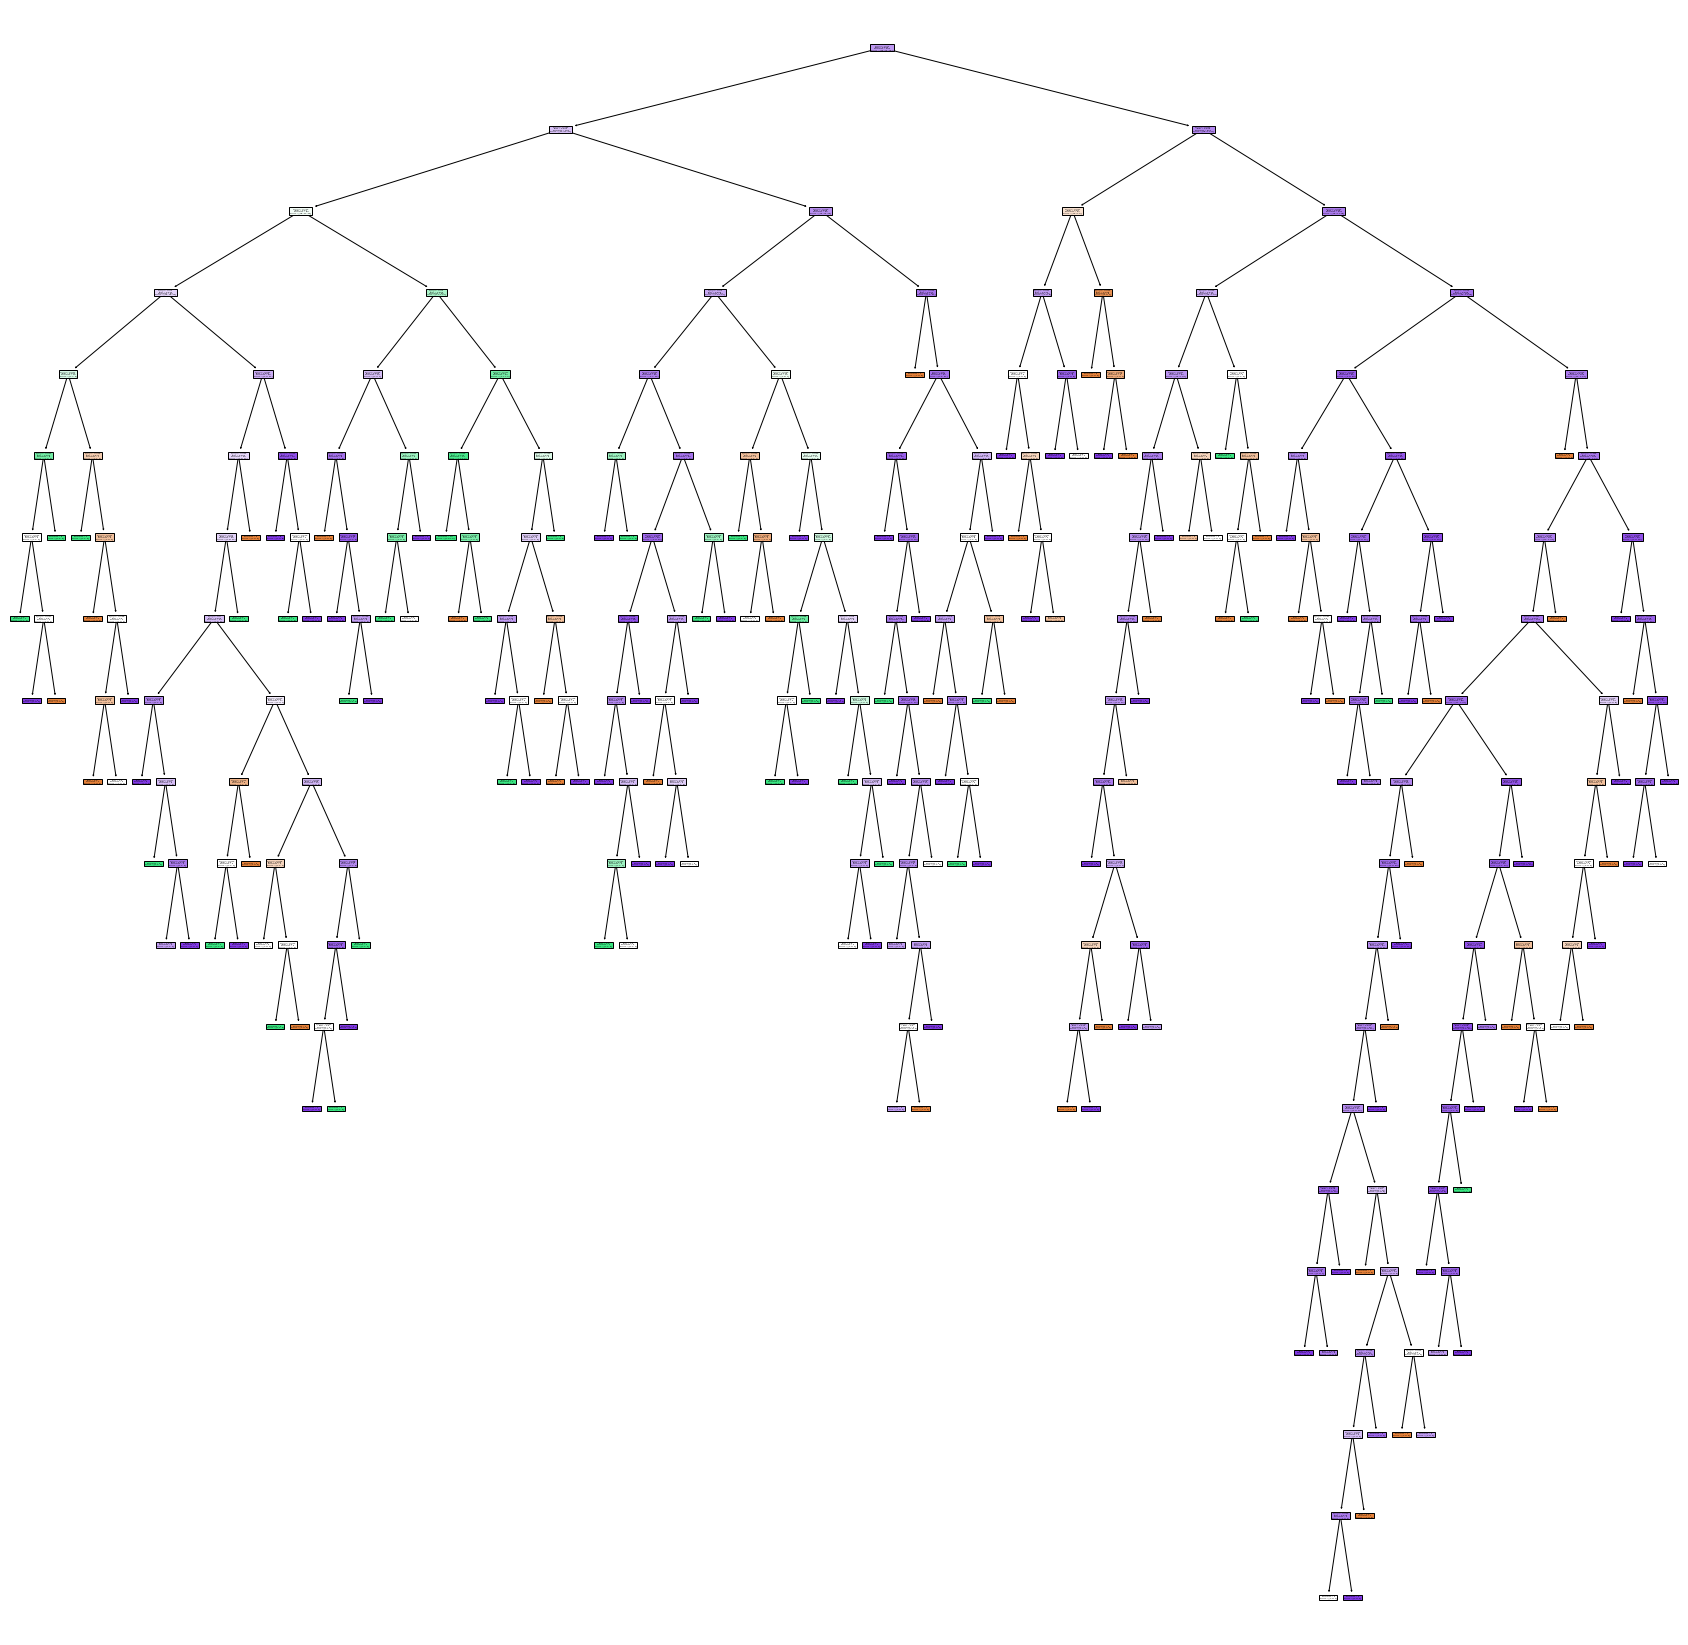

In [81]:
plt.figure(figsize = (30,30))
tree.plot_tree(DTF,filled =True)

<AxesSubplot: xlabel='remote_ratio', ylabel='Density'>

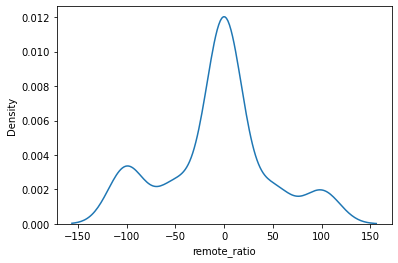

In [78]:
sns.kdeplot(pred-y_test)

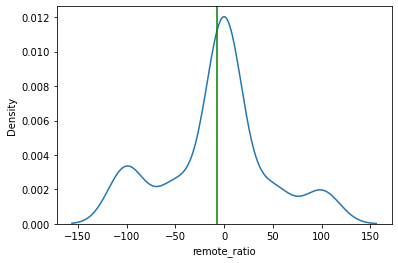

In [80]:
sns.kdeplot(pred-y_test)
plt.axvline((pred-y_test).mean(),color = 'green')